In [23]:
import random
import numpy as np
import matplotlib.pyplot as plt 

all_pages = range(100)
busy_pages = random.sample(all_pages, int(0.1*len(all_pages)))
idle_pages= list(set(all_pages).difference(set(busy_pages)))

In [24]:
lst = busy_pages*81
lst = lst + idle_pages

In [25]:
lst = np.array(lst)
lst = np.random.choice(lst, 1000).tolist()

[0.07, 0.144, 0.206, 0.338, 0.635, 0.758, 0.819]


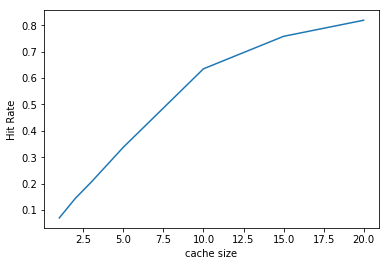

In [26]:
# FIFO
cache_size = [1,2,3,5,10,15,20]
hit_rate_array = []
for j in cache_size:
    cache = []
    hit = 0
    miss = 0
    for i in lst:
        if(i not in cache):
            miss = miss + 1.0
            if(len(cache)<j):
                cache.append(i)
            else:
                cache.pop(0)
                cache.append(i)
        else:
            hit = hit + 1.0
    hit_rate_array.append(hit/(hit+miss))
print hit_rate_array
plt.plot(cache_size, hit_rate_array)
plt.ylabel('Hit Rate')
plt.xlabel('cache size')
plt.show()

[0.07, 0.145, 0.203, 0.354, 0.692, 0.87, 0.889]


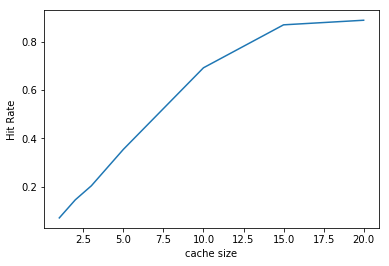

In [27]:
# LRU
cache_size = [1,2,3,5,10,15,20]
hit_rate_array = []
for j in cache_size:
    cache = []
    hit = 0
    miss = 0
    for i in lst:
        if(i not in cache):
            miss = miss + 1.0
            if(len(cache)<j):
                cache.insert(0,i)
            else:
                cache.pop(-1)
                cache.insert(0,i)
        else:
            cache.remove(i)
            cache.insert(0,i)
            hit = hit + 1.0
    hit_rate_array.append(hit/(hit+miss))
print hit_rate_array
plt.plot(cache_size, hit_rate_array)
plt.ylabel('Hit Rate')
plt.xlabel('cache size')
plt.show()

[0.07, 0.289, 0.426, 0.607, 0.854, 0.9, 0.91]


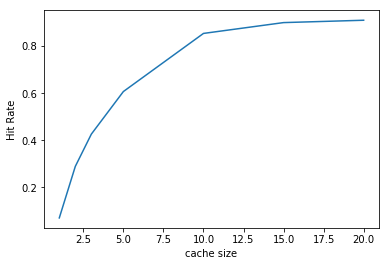

In [28]:
# OPTIMAL
def foo(cache,l):
    dis = -1
    ans = -1
    for i in cache:
        if(i not in l):
            ans = i
            break
        if(l.index(i)>dis):
            dis = l.index(i)
            ans = i
    return ans
cache_size = [1,2,3,5,10,15,20]
hit_rate_array = []
for j in cache_size:
    cache = []
    hit = 0
    miss = 0
    for i in lst:
      #  print '************'
        if(i not in cache):
       #     print 'miss'
            miss = miss + 1.0
            if(len(cache)<j):
                cache.append(i)
            else:
        #        print foo(cache,lst[int(hit+miss):])
                cache.remove(foo(cache,lst[int(hit+miss):]))
                cache.append(i)
        else:
         #   print 'hit'
            hit = hit + 1.0
        #print cache
    hit_rate_array.append(hit/(hit+miss))
print hit_rate_array
plt.plot(cache_size, hit_rate_array)
plt.ylabel('Hit Rate')
plt.xlabel('cache size')
plt.show()

[0.09399999999999999, 0.16840000000000002, 0.24510000000000004, 0.3843, 0.6527000000000001, 0.7909, 0.8526999999999998]


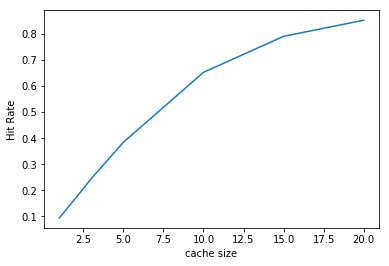

In [15]:
# Random
cache_size = [1,2,3,5,10,15,20]
cummulative_hit_rate = []
for _ in range(10):
    # Same experiment is being done 10 times for random with different random values
    hit_rate_array = []
    for j in cache_size:
        cache = []
        hit = 0
        miss = 0
        for i in lst:
            if(i not in cache):
                miss = miss + 1.0
                if(len(cache)<j):
                    cache.append(i)
                else:
                    cache.pop(random.randint(0,len(cache)-1))
                    cache.insert(0,i)
            else:
                hit = hit + 1.0
        hit_rate_array.append(hit/(hit+miss))
    cummulative_hit_rate.append(hit_rate_array)
#print cummulative_hit_rate
hit_rate_array = []
for i in range(7):
    count = 0
    for j in cummulative_hit_rate:
        count = count + j[i]
    hit_rate_array.append(count/10)
print hit_rate_array
plt.plot(cache_size, hit_rate_array)
plt.ylabel('Hit Rate')
plt.xlabel('cache size')
plt.show()

In [29]:
l = lst[:200]
busy_count = 0
idle_count = 0
# Randomly taking first 200 pages of randomly ordered page requirements
for i in l:
    if i in busy_pages:
        busy_count = busy_count + 1
    else:
        idle_count = idle_count + 1
print idle_count
print busy_count

21
179


Thus we can see that 90% of the idle pages are accessed 27 times while 10% of the pages are accessed 173 times